## This notebook will focus on performing EDA on the sales data

In [ ]:
__author__ = "konwar.m"
__copyright__ = "Copyright 2022, AI R&D"
__credits__ = ["konwar.m"]
__license__ = "Individual Ownership"
__version__ = "1.0.1"
__maintainer__ = "konwar.m"
__email__ = "rickykonwar@gmail.com"
__status__ = "Development"

### The following steps would be covered so as to perform EDA on sales data  
1. Data Sourcing
2. Data Cleaning
3. Univariate Analysis
4. Bivariate Analysis
5. Multivariate Analysis

### 1. Data Sourcing:  
This dataset is collected from a public data source platform known as Kaggle. Please follow this link to get this:  
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

Also find crucial information regarding this dataset:

**File descriptions**  
sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.  
test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.  
sample_submission.csv - a sample submission file in the correct format.  
items.csv - supplemental information about the items/products.  
item_categories.csv  - supplemental information about the items categories.  
shops.csv- supplemental information about the shops.

**Data fields**  
ID - an Id that represents a (Shop, Item) tuple within the test set  
shop_id - unique identifier of a shop  
item_id - unique identifier of a product  
item_category_id - unique identifier of item category  
item_cnt_day - number of products sold. You are predicting a monthly amount of this measure  
item_price - current price of an item  
date - date in format dd/mm/yyyy  
date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33  
item_name - name of item  
shop_name - name of shop  
item_category_name - name of item category  

### 2. Data Cleaning

Irregularities in a dataset are of different types. Please refer to details below  
Missing Values  
Incorrect Format  
Incorrect Headers  
Anomalies/Outliers

In [1]:
# Importing useful libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir('..')
os.getcwd()

'c:\\Users\\manash.jyoti.konwar\\Documents\\AI_Random_Projects\\ML-Retail-Sales'

In [5]:
# Read the data set of "Marketing Analysis" in data.
retail_data = pd.read_csv(os.path.join('datasets', 'sales_train.csv'))

# Printing the data
retail_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### Check for missing values  

There are mainly three types of missing values.  
**MCAR(Missing completely at random):** These values do not depend on any other features.  
**MAR(Missing at random):** These values may be dependent on some other features.  
**MNAR(Missing not at random):** These missing values have some reason for why they are missing.

In [6]:
# Checking the missing values
retail_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

If there are lesser number of missing values in any of the column, they can be easily removed from the dataset but the best way to handle such situation  
is to replace those missing values with 'mean' or 'median' in case of numerical values or 'mode' in case of categorical column

### Handling outliers

There are two types of outliers:  
**1. Univariate outliers:** Univariate outliers are the data points whose values lie beyond the range of expected values based on one variable.  
**2. Multivariate outliers:** While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data  
with some other variable, these values may lie far from the expected value.

![Outlier Types](../assets/outlier_types.jpg)


### 3. Univariate Analysis

**Categorical Unordered Univariate Analysis:** Its applied on categorical columns once we identify which columns are object types from the dataset

In [7]:
retail_data.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [23]:
# Let's calculate the percentage of unique date counts.
retail_data.head(100).date.value_counts(normalize=True)

02.01.2013    0.10
06.01.2013    0.07
27.01.2013    0.07
25.01.2013    0.06
11.01.2013    0.05
19.01.2013    0.05
03.01.2013    0.05
07.01.2013    0.05
04.01.2013    0.05
10.01.2013    0.05
12.01.2013    0.05
16.01.2013    0.04
26.01.2013    0.04
05.01.2013    0.04
08.01.2013    0.03
20.01.2013    0.02
14.01.2013    0.02
09.01.2013    0.02
23.01.2013    0.02
13.01.2013    0.02
15.01.2013    0.02
30.01.2013    0.01
29.01.2013    0.01
24.01.2013    0.01
21.01.2013    0.01
22.01.2013    0.01
28.01.2013    0.01
31.01.2013    0.01
17.01.2013    0.01
Name: date, dtype: float64

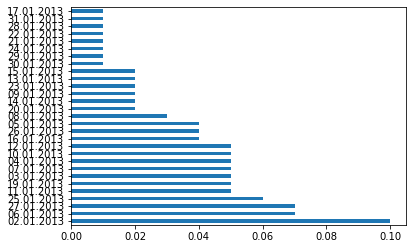

In [24]:

#plot the bar graph of percentage dates
retail_data.head(100).date.value_counts(normalize=True).plot.barh()
plt.show()

**Bivariate Analysis:** If we analyze data by taking two variables/columns into consideration from a dataset may be numerical columns one on one

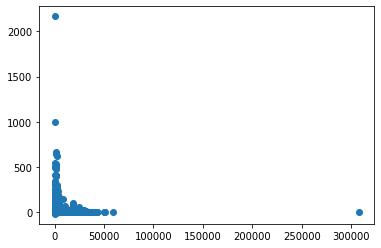

In [26]:
#plot the scatter plot of balance and salary variable in data
plt.scatter(retail_data.item_price, retail_data.item_cnt_day)
plt.show()

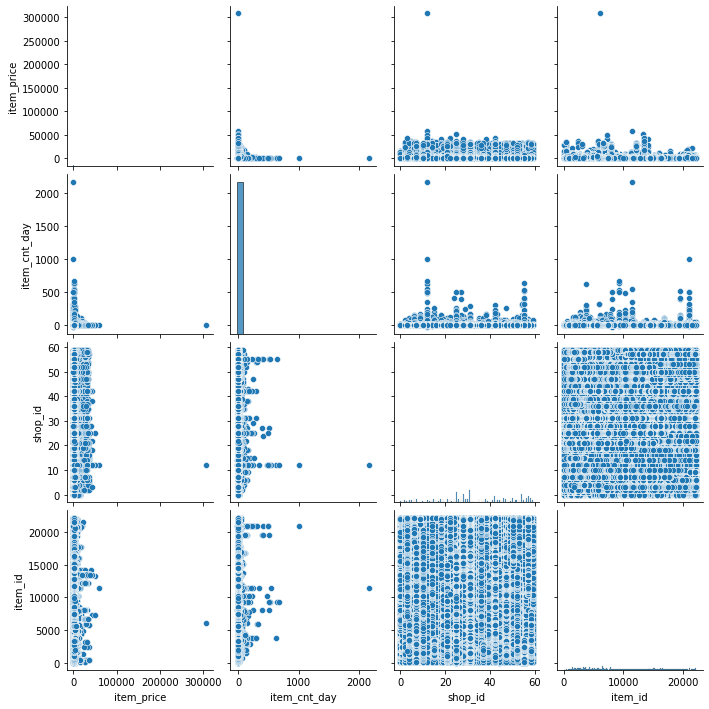

In [28]:
#plot the pair plot of salary, balance and age in data dataframe.
sns.pairplot(data = retail_data, vars=['item_price','item_cnt_day','shop_id', 'item_id'])
plt.show()